# Preprocessing module of BAMT

<p> Before passing data to any BN learning stage, user should clean data.
    It can be done with prepocessing module. <p>

## Importing modules and setting sys path vars

In [1]:
# Setting path vars 
import os,sys
from pathlib import Path
currentdir = Path(os.getcwd())
sys.path.insert(0, os.path.dirname(currentdir.parent))
sys.path.insert(0, os.path.dirname(currentdir))
print(str(sys.path[0:3]))

['C:\\Users\\Roman\\Desktop\\GitBamt\\BAMT', 'C:\\Users\\Roman\\Desktop\\GitBamt', 'C:\\Users\\Roman\\Desktop\\GitBamt\\BAMT\\tutorials']


In [2]:
%%time
import BAMT.Preprocessors as pp

import pandas as pd
import numpy as np
from sklearn import preprocessing

Wall time: 2.53 s


## Load  data into memory

*NB: Other dataset to experiment with can be found in Data folder.*

In [3]:
hack = pd.read_csv(r'../Data/hack_processed_with_rf.csv')

In [4]:
hack.sample(10)

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/offshore,...,Period,Lithology,Gross,Netpay,Porosity,Permeability,Oil density,Oil recovery factor,Condensate recovery factor,Gas recovery factor
469,WEST BRANCH,DUNDEE,USA,NORTH AMERICA,MICHIGAN,NaN,44.2620,-84.1784,MARATHON,ONSHORE,...,DEVONIAN,LIMESTONE,54.0,8.4,NaN,4.0,854.984894,NaN,NaN,NaN
200,HIDES,IMBURU-TORO,PAPUA NEW GUINEA,FAR EAST,PAPUAN FTB,COMPRESSION,-6.0136,142.8409,OIL SEARCH LTD,ONSHORE,...,JURASSIC-CRETACEOUS,SANDSTONE,147.0,72.0,10.0,100.0,766.937669,NaN,NaN,0.75
465,WEIYUAN,DENGYING,CHINA,FAR EAST,SICHUAN,COMPRESSION,29.7333,104.7500,PETROCHINA,ONSHORE,...,PROTEROZOIC,DOLOMITE,639.9,27.6,1.8,0.2,NaN,NaN,NaN,0.36
470,WEST CHEYENNE,UPPER MORROW (PURYEAR),USA,NORTH AMERICA,ANADARKO,COMPRESSION,35.5850,-99.7432,APACHE /BURLINGTON,ONSHORE,...,CARBONIFEROUS,CONGLOMERATE,13.8,6.9,13.0,0.4,NaN,NaN,NaN,0.85
177,GOTURDEPE,RED SERIES,TURKMENISTAN,FORMER SOVIET UNION,CASPIAN SOUTH,COMPRESSION,39.6600,53.7700,TURKMENNEFT,ONSHORE,...,NEOGENE,SANDSTONE,2250.0,240.0,23.0,100.0,860.182371,0.48,NaN,0.82
479,WHITE ROSE,AVALON (SOUTH POOL),CANADA,NORTH AMERICA,JEANNE D ARC,EXTENSION,46.8638,-48.0664,HUSKY ENERGY,OFFSHORE,...,CRETACEOUS,SANDSTONE,295.2,98.4,15.0,127.0,876.160991,0.32,NaN,NaN
210,INDEFATIGABLE,LEMAN SANDSTONE,UK,EUROPE,NORTH SEA SOUTHERN,INVERSION,53.3932,2.5239,SHELL /PERENCO,OFFSHORE,...,PERMIAN,SANDSTONE,60.0,59.1,15.0,30.0,NaN,NaN,NaN,0.84
326,NORTHEAST CEDARDALE,HUNTON (HARAGAN),USA,NORTH AMERICA,ANADARKO,COMPRESSION,36.4227,-98.9165,LOUIS DREYFUS NATURAL GAS,ONSHORE,...,DEVONIAN,DOLOMITE,75.0,11.4,16.0,20.0,746.701847,NaN,NaN,NaN
180,GRIFFIN,ZEEPAARD,AUSTRALIA,FAR EAST,CARNARVON,NaN,-21.2356,114.6200,BHP BILLITON,OFFSHORE,...,CRETACEOUS,SANDSTONE,128.1,88.5,NaN,1300.0,758.713137,NaN,NaN,NaN
238,KITTY,MUDDY,USA,NORTH AMERICA,POWDER RIVER,COMPRESSION,44.3344,-105.6783,DEVON ENERGY AND OTHERS,ONSHORE,...,CRETACEOUS,SHALY SANDSTONE,24.0,3.6,10.0,15.0,828.454333,NaN,NaN,NaN


In [5]:
hack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Field name                  514 non-null    object 
 1   Reservoir unit              514 non-null    object 
 2   Country                     514 non-null    object 
 3   Region                      514 non-null    object 
 4   Basin name                  514 non-null    object 
 5   Tectonic regime             442 non-null    object 
 6   Latitude                    514 non-null    float64
 7   Longitude                   514 non-null    float64
 8   Operator company            514 non-null    object 
 9   Onshore/offshore            514 non-null    object 
 10  Hydrocarbon type            514 non-null    object 
 11  Reservoir status            514 non-null    object 
 12  Structural setting          514 non-null    object 
 13  Depth                       514 non

<AxesSubplot:>

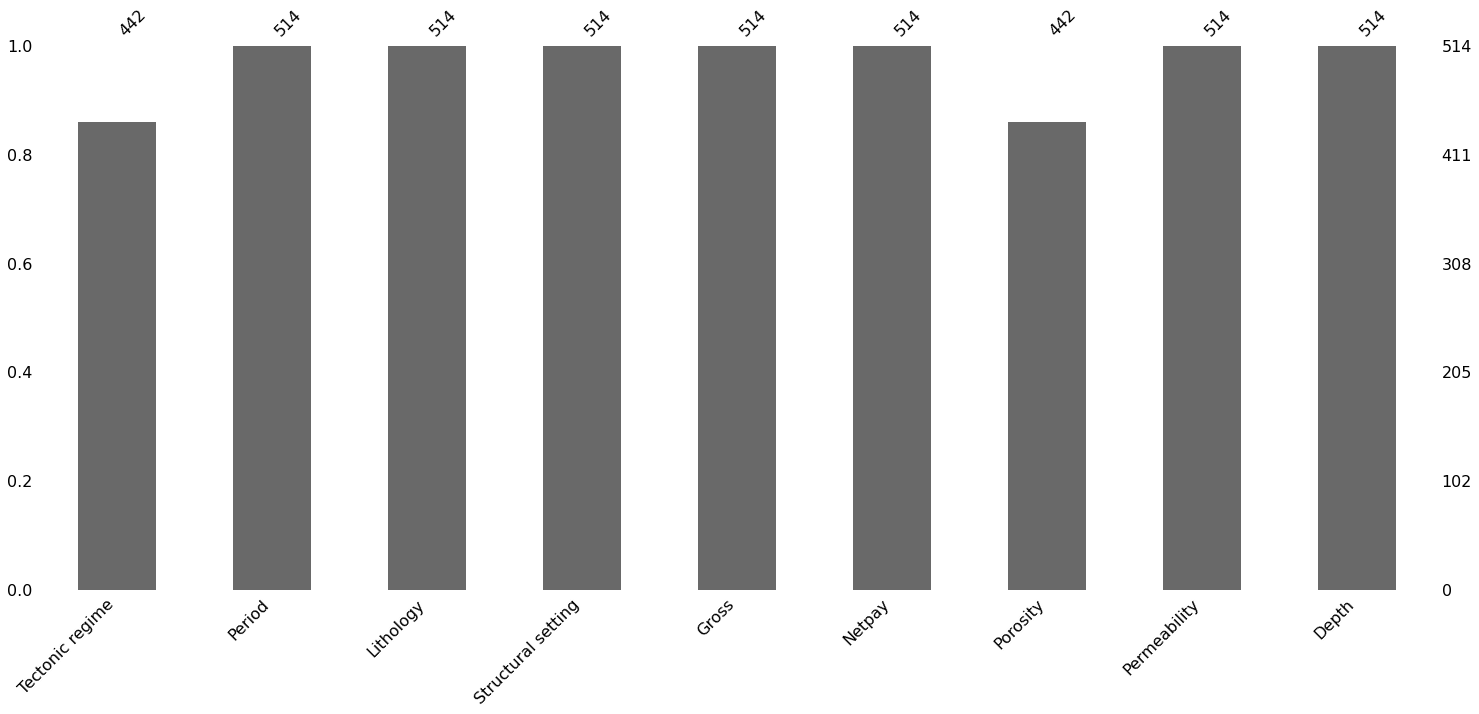

In [10]:
# NaN Analysis
import missingno as msno
msno.bar(hack)

In [6]:
# Leave informative columns 
cols = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
hack = hack[cols]

## Creating / Applying preproccesors

<p> To  apply preproccesor user should provide a pipeline: list, with (Name of Object, Object). 
    <br>Order is important! <br>
    User can pass an empty list in order to drop na. <p>

In [11]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(hack)

In [12]:
discretized_data.sample(5)

,Tectonic regime,Period,Lithology,Structural setting,Gross,Netpay,Porosity,Permeability,Depth
144,3,7,9,7,2,3,2,3,4
172,2,7,11,6,3,2,2,4,4
351,0,7,11,2,0,1,4,4,0
436,3,7,9,7,1,2,4,2,3
334,4,17,11,6,1,1,4,4,0


In [14]:
discretized_data.isna().sum()

Tectonic regime       0
Period                0
Lithology             0
Structural setting    0
Gross                 0
Netpay                0
Porosity              0
Permeability          0
Depth                 0
dtype: int64

In [20]:
empty_p = pp.Preprocessor([])
empty_p_data, est_e = empty_p.apply(hack)

In [21]:
empty_p_data

,Tectonic regime,Period,Lithology,Structural setting,Gross,Netpay,Porosity,Permeability,Depth
0,COMPRESSION,JURASSIC,LIMESTONE,FORELAND,75.0,55.2,21.0,410.0,1815.0
1,EXTENSION,CRETACEOUS,SANDSTONE,RIFT,223.5,43.2,10.0,8.0,3084.6
2,STRIKE-SLIP,NEOGENE,THINLY-BEDDED SANDSTONE,WRENCH,34.5,19.8,22.0,200.0,2952.9
3,STRIKE-SLIP,NEOGENE,SANDSTONE,WRENCH,152.7,123.0,20.0,300.0,3149.7
4,COMPRESSION,CRETACEOUS,LIMESTONE,SALT,75.0,30.0,21.0,60.0,1486.5
...,...,...,...,...,...,...,...,...,...
437,EXTENSION,PALEOGENE,SANDSTONE,RIFT,69.0,20.7,26.7,1872.0,1615.2
438,EXTENSION,PALEOGENE,SANDSTONE,RIFT,49.2,18.6,23.2,121.0,1416.3
439,EXTENSION,MESOZOIC,VOLCANICS,RIFT,147.6,58.2,12.7,3.6,2952.9
440,COMPRESSION,CARBONIFEROUS,SANDSTONE,FORELAND,78.6,9.9,24.0,30.0,561.0


In [23]:
discretized_data.isna().sum(), est_e

(Tectonic regime       0
 Period                0
 Lithology             0
 Structural setting    0
 Gross                 0
 Netpay                0
 Porosity              0
 Permeability          0
 Depth                 0
 dtype: int64,
 None)